In [ ]:
from scipy.stats import multivariate_normal
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# File Paths
mv_path = "./data/mv.csv"
unif_path = "./data/unif.csv"
mv2_path = "./data/mv2.csv"
mv3_path = "./data/mv3.csv"

# Read in Data
mv_df = pd.read_csv(mv_path, index_col = 0)
unif_df = pd.read_csv(unif_path, index_col = 0)
mv2_df = pd.read_csv(mv2_path, index_col = 0)
mv3_df = pd.read_csv(mv3_path, index_col = 0)

In [ ]:
# Create Figure
fig, (axs) = plt.subplots(2,2, figsize = (6,6))

# Plot each group in each dataset as a unique color
for ax, df in zip(axs.flatten(), [mv_df, unif_df, mv2_df, mv3_df]):
    for cat, col in zip(df['cat'].unique(), ["#1b9e77", "#d95f02", "#7570b3"]):
        ax.scatter(df[df.cat == cat].x, df[df.cat == cat].y, c = col, label = cat, alpha = .15)
    ax.legend()

Question_1
Question 1:
10 points

For each point  ii , the cluster indicator  cici  for the cluster  kk  can be computed according to the equation

ci=argmink ||xi−μk||2.
ci=argmink ||xi−μk||2.
 
Define a function called 'assign_clusters_k_means' that accepts the following arguments:

A two-dimensional NumPy array with the coordinates of each point.
A two-dimensional NumPy array with the coordinates of the centroid of each cluster.
Your function should determine which cluster centroid is closest to each point and return a two-dimensional 'NumPy' array, where each row indicates to which cluster a point is closest to.

For example, the row [0,1,0,...,0] indicates that the point is assigned to the second cluster, and the row [0,0,...,1] indicates the point is assigned to the last cluster.

In [ ]:
def assign_clusters_k_means(points, clusters):
    cls=np.argmax([[np.linalg.norm(y-x) for x in clusters] for y in points],axis=1)
    cls_wts=np.zeros((len(points),len(clusters)))
    for i in range(len(points)):
        cls_wts[i][cls[i]]=1
    cls_wts
    return cls_wts

import numpy as np
points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
clusters = np.array([[0,1],[5,4],[7,4]])
print(assign_clusters_k_means(points, clusters))

"""
    Determine the nearest cluster to each point, returning an array indicating the closest cluster
    
    Positional Arguments:
        points: a 2-d NumPy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        clusters: a 2-d NumPy array where each row is a different centroid cluster;
            each column indicates the location of that centroid in that dimension
    
    Example:
        points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
        clusters = np.array([[0,1],[5,4]])
        cluster_weights = assign_clusters_k_means(points, clusters)
        
        print(cluster_weights) #--> np.array([[1, 0],
                                              [1, 0],
                                              [0, 1],
                                              [0, 1],
                                              [0, 1]])
"""
    # NB: 'cluster_weights' is used as a common term between functions
    # the name makes more sense in soft-clustering contexts

###
### YOUR CODE HERE

rows = clusters.shape[0]
    #print(rows)
    cols = clusters.shape[1]
    elements = np.zeros(rows)
    lst = list()
    weights = list()
    for pt in points:
        for cl in clusters:
             lst.append(np.linalg.norm(pt-cl))
        lowest = min(lst)
        lowest_index = lst.index(lowest)
        #print (lst)
        #print(lst)
        #print(lowest_index)
        #print(elements)
        elements[lowest_index] = 1
        weights.append(elements)
        elements = np.zeros(rows)
        lst.clear()
        
        
    return np.array(weights)
###

In [ ]:
def assign_clusters_k_means(points, clusters):
   cls=np.argmax([[np.linalg.norm(y-x) for x in clusters] for y in points],axis=1)
   cls_wts=np.zeros((len(points),len(clusters)))
   for i in range(len(points)):
       cls_wts[i][cls[i]]=1
   cls_wts
   return cls_wts

import numpy as np
points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
clusters = np.array([[0,1],[5,4],[7,4]])
print(assign_clusters_k_means(points, clusters))



In [ ]:
def assign_clusters_k_means(points, clusters):
   cls=np.argmax([[np.linalg.norm(y-x) for x in clusters] for y in points],axis=1)
   cls_wts=np.zeros((len(points),len(clusters)))
   for i in range(len(points)):
       cls_wts[i][cls[i]]=1
   cls_wts
   return cls_wts

import numpy as np
points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
clusters = np.array([[0,1],[5,4],[7,4]])
print(assign_clusters_k_means(points, clusters))

[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*10 points*


The proportion $\phi_i(k)$ that a point $i$ belongs to a cluster $k$ is defined by the function for weighted k-means: 

$$\phi_i(k) = \frac{\exp\{-\frac{1}{\beta}||x_i-\mu_k||^2\}}{\sum_j \exp\{-\frac1\beta||x_i-\mu_j||^2\}}.$$ 

Define a  function called 'assign_clusters_soft_k_means' that accepts the following 
arguments:

- A two-dimensional 'NumPy' array with the coordinates of each point.
- A two-dimensional 'NumPy' array with the coordinates of the centroid of each cluster.
- A number 'beta' that defines and helps in identifying the closest distance between the points and clusters.

Your function should return a two-dimensional 'NumPy' array with the cluster weights. Each row in the array should indicate the proportion of how each point 'belongs' to all the clusters. 

For example, if a point 'belongs' evenly to two clusters, the corresponding row in the array should be [.5,.5].  

 


In [ ]:
### GRADED
import numpy as np
import pprint

### YOUR SOLUTION HERE
def assign_clusters_soft_k_means(points, clusters, beta):
    
    """
    Return an array indicating the proportion of the point
        belonging to each cluster
    
    Positional Arguments:
        points: a 2-d NumPy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        clusters: a 2-d NumPy array where each row is a different centroid cluster;
            each column indicates the location of that centroid in that dimension
        beta: a number indicating what distance can be considered 'close'
        
    Example:
        points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
        clusters = np.array([[0,1],[5,4]])
        beta = 1
        cluster_weights = assign_clusters_soft_k_means(points, clusters, beta)
        
        print(cluster_weights) #--> np.array([[0.99707331, 0.00292669],
                                              [0.79729666, 0.20270334],
                                              [0.00292669, 0.99707331],
                                              [0.04731194, 0.95268806],
                                              [0.1315826 , 0.8684174 ]])
    """

###
### YOUR CODE HERE
points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
clusters = np.array([[0,1],[5,4]])
beta = 1
cluster_weights = assign_clusters_soft_k_means(points, clusters, beta)
# pretty print the array for better visualization
pprint.pprint(cluster_weights)
###


In [ ]:
def assign_clusters_soft_k_means(points, clusters, beta):
    """
    Return an array indicating the porportion of the point
        belonging to each cluster
    
    Positional Arguments:
        points: a 2-d numpy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        clusters: a 2-d numpy array where each row is a different centroid cluster;
            each column indicates the location of that centroid in that dimension
        beta: a number indicating what distance can be considered "close"
    """
    
    def distance(p,c):
        return ((p[0] - c[0])**2 + (p[1] - c[1])**2)**0.5
      
    denominators = [np.sum([ np.exp((-1/beta)*distance(p,c)) for c in clusters ]) for p in points]
        
    cluster_weights = np.zeros((len(points), len(clusters)))
    for i, point in enumerate(points):
        cluster_weights[i] = [np.exp((-1/beta)*distance(point,c)) / denominators[i] for c in clusters]

    return np.array(cluster_weights)

In [ ]:
 def distance(p,c):
        return ((p[0] - c[0])**2 + (p[1] - c[1])**2)**0.5
      
    denominators = [np.sum([ np.exp((-1/beta)*distance(p,c)) for c in clusters ]) for p in points]
        
    cluster_weights = np.zeros((len(points), len(clusters)))
    for i, point in enumerate(points):
        cluster_weights[i] = [np.exp((-1/beta)*distance(point,c)) / denominators[i] for c in clusters]

    return np.array(cluster_weights)

[Back to top](#Index:) 
<a id='q3'></a>

### Question 3:

*10 points*

For this question, the proportion $\phi_i(k)$ that a point $i$ belongs to cluster $k$ is defined by the $\phi$ function for GMM:  

$$\phi_i(k) = \frac{\pi_k N(x_i|\mu_k,\Sigma_k)}{\sum_j \pi_j N(x_i|\mu_j,\Sigma_k)},$$ 

where $N(x_i|\mu_k,\Sigma_k)$ can be computed by using 'stats.multivariate_normal(mu,Sigma).pdf(x)'. For example, if $i = 0$ and $k = 0$, then  

    c = clusters[0]
    p = points[0]
    stats.multivariate_normal(c[0],c[2]).pdf(x)


Define a  function called 'assign_clusters_GMM' that accepts the following 
arguments:

- A two-dimensional 'NumPy' array with the coordinates of each point.
- A list of tuples. The $k^{th}$ tuple in the list should contain the parameters $(\mu_k, \pi_k, \Sigma_k)$ defining the cluster k. In particular, $\mu$ is a one-dimensional 'NumPy' array, $\pi$ is number, and $\Sigma$ is two-dimensional 'NumPy' array.

Your function should return a two-dimensional 'NumPy' array with the cluster weights. Each row in the array should indicate the proportion of how each point 'belongs' to all the clusters. For example, if a point 'belongs' evenly to two clusters, the corresponding row in the array should be [.5,.5].    




In [ ]:
### GRADED
### Follow directions above

### YOUR SOLUTION HERE
def assign_clusters_GMM(points, clusters):
    def distance(p,c):
        return ((p[0] - c[0])**2 + (p[1] - c[1])**2)**0.5
      
    denominators = [np.sum([ np.exp((-1/beta)*distance(p,c)) for c in clusters ]) for p in points]
        
    cluster_weights = np.zeros((len(points), len(clusters)))
    for i, point in enumerate(points):
        cluster_weights[i] = [np.exp((-1/beta)*distance(point,c)) / denominators[i] for c in clusters]

    return np.array(cluster_weights)
    """    
    Return an array indicating the porportion of the point
        belonging to each cluster
    
    Positional Arguments:
        points: a 2-d NumPy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        clusters: a list of tuples. Each tuple describes a cluster.
            The first element of the tuple is a 1-d NumPy array indicating the
                location of that centroid in each dimension
            The second element of the tuple is a number, indicating the weight (pi)
                of that cluster
            The thrid element is a 2-d NumPy array corresponding to that cluster's
                covariance matrix.
        
    Example:
        points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
        clusters = [(np.array([0,1]), 1, np.array([[1,0],[0,1]])),
                    (np.array([5,4]), 1, np.array([[1,0],[0,1]]))]
        
        cluster_weights = assign_clusters_GMM(points, clusters)
        
        print(cluster_weights) #--> np.array([[9.99999959e-01 4.13993755e-08]
                                              [9.82013790e-01 1.79862100e-02]
                                              [4.13993755e-08 9.99999959e-01]
                                              [2.26032430e-06 9.99997740e-01]
                                              [2.47262316e-03 9.97527377e-01]])
    """

###
### YOUR CODE HERE
###


Question 4:
10 points

For this question, the centroid  μkμk  for the cluster  kk  should be updated with the formula:

μk=∑ixi𝟙{ci=k}∑i𝟙{ci=k},
μk=∑ixi1{ci=k}∑i1{ci=k},
 
where  cici  indicates to which cluster, a point  ii  is assigned. Remember that, generally, the new centroids are the center (mean) of all points associated with the cluster.

Define a function called 'update_clusters_k_means' that accepts the following arguments:

A two-dimensional 'NumPy' array with the coordinates of each point.
A two-dimensional 'NumPy' array indicating the cluster assignment to each point. We will define this array to be 'cluster_weights'. Each row of 'cluster_weights' should contain a single 1 and 0's everywhere else. For example, if the point  ii  is assigned to cluster '0', then the row corresponding to the point  ii  in 'cluster_weights' should be [1,0,0,...,0].
Your function should return a two-dimensional 'NumPy' array giving the new locations of the centroid for each cluster.

In [ ]:
### GRADED
### Follow directions above

### YOUR SOLUTION HERE
def update_clusters_k_means(points, cluster_weights):
    
    """
    Update the cluster centroids via the k-means algorithm.
    
    Positional Arguments -- 
        points: a 2-d NumPy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        cluster_weights: a 2-d NumPy array where each row corresponds to each row in 'points'
            and the columns indicate which cluster the point 'belongs' to: '1' in the kth
            column indicates belonging to the kth cluster
            
    Example:
    
        points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
        cluster_weights = np.array([[1, 0],[1, 0],[0, 1],[0, 1],[0, 1]])
        
        new_cents = update_clusters_k_means(points, cluster_weights)
        
        print(new_cents) #--> np.array([[1. , 1.5],
                                        [4. , 4. ]])
    
    """

###
### YOUR CODE HERE
###


In [ ]:
def update_clusters_k_means(points, cluster_weights):

    """
    Update the cluster centroids via the k-means algorithm
    Positional Arguments --
        points: a 2-d numpy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        cluster_weights: a 2-d numy array where each row corresponds to each row in "points"
            and the columns indicate which cluster the point "belongs" to - a "1" in the kth
            column indicates belonging to the kth cluster
    Example:
        points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
        cluster_weights = np.array([[1, 0],[1, 0],[0, 1],[0, 1],[0, 1]])
        new_cents = update_clusters_k_means(points, cluster_weights)
        print(new_cents) #--> np.array([[1. , 1.5],
                                        [4. , 4. ]])
    """
    new_clusts = []

    for c in cluster_weights.T:
        c_points = points.copy()[c==1,:]
        new_clusts.append(np.apply_along_axis(np.mean,0,c_points).reshape(1,-1))

    new_clusts = np.concatenate(new_clusts)

    return new_clusts

In [ ]:
 new_clusts = []

    for c in cluster_weights.T:
        c_points = points.copy()[c==1,:]
        new_clusts.append(np.apply_along_axis(np.mean,0,c_points).reshape(1,-1))

    new_clusts = np.concatenate(new_clusts)

    return new_clusts

In [ ]:
def update_clusters_k_means(points, cluster_weights):
    lst1 = list()
    index_list1 = list()
    index_list2 = list()
    result_list = list()
    numesum1 = np.zeros(cluster_weights.shape[1])
    numesum2 = np.zeros(cluster_weights.shape[1])
    order = 0
    i = 0
    first = (1,0)
    first_count = 0
    second = (0,1)
    second_count = 0
    ptlist = list()
    for pt in points:
        arr = tuple(pt)
        ptlist.append(arr)  
    for cl in cluster_weights:
        arr = tuple(cl)
        if(arr == first):
            first_count = first_count + 1
            index_list1.append(i)
        elif(arr == second):
            second_count = second_count + 1
            index_list2.append(i)    
        i = i + 1
    for item in index_list1:
        numesum1 = numesum1 + np.array(ptlist[item])
        if(item == 0):
            order = 1
    for item in index_list2:
        numesum2 = numesum2 + np.array(ptlist[item])
        if(item == 0):
            order = 2
        
    result1 = numesum1/first_count
    result2 = numesum2/second_count
    if(order == 1):
        result_list.append(result1)
        result_list.append(result2)
    else:
        result_list.append(result2)
        result_list.append(result1)
    arrlist = np.array(result_list)
    return arrlist

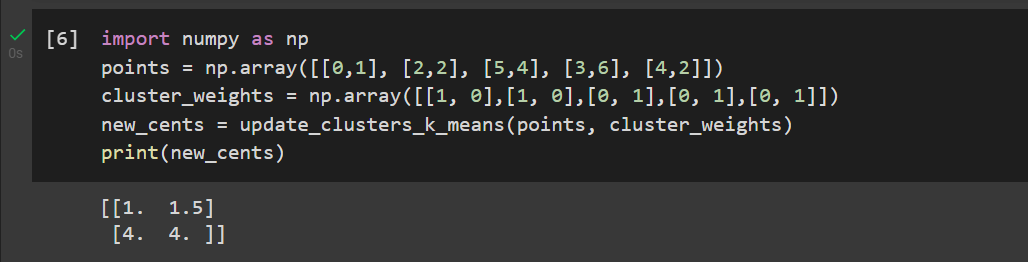

[Back to top](#Index:) 
<a id='q5'></a>

### Question 5:

*10 points*

For this question, the centroid $\mu_k$ for the cluster $k$ should be updated using the formula:  

$$\mu_k = \frac{\sum_ix_i\phi_i(k)}{\sum_i\phi_i(k)}.$$  

Define a  function called 'update_clusters_soft_k_means' that accepts the following 
arguments:

- A two-dimensional 'NumPy' array with the coordinates of each point.
- A two-dimensional 'NumPy' array indicating the cluster assignment to each point. We will define this array to be 'cluster_weights'. Each row of 'cluster_weights' should contain the numeric weights $\phi_i(k)$ corresponding to the point $i$ and the cluster $k$. The entries of each row should add up to one. For example, if we have two clusters and the point $i$ is evenly assigned to both of them, then the row corresponding to the point $i$ in 'cluster_weights' should be [.5,.5]. Therefore, in this case $\phi_i(0) = .5 \text{ and }\phi_i(1) = .5$.

Your function should return a two-dimensional 'NumPy' array giving the updated locations of the centroid for each cluster. 


In [ ]:
### GRADED
### Follow directions above

### YOUR SOLUTION HERE
def update_clusters_soft_k_means(points, cluster_weights):
    
    """
    Update the cluster centroids according to the soft k-means algorithm
    
    Positional Arguments --
        points: a 2-d NumPy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        cluster_weights: a 2-d NumPy array where each row corresponds to each row in 
            'points'. The values in that row corresponding to the amount that point is associated
            with each cluster.
            
    Example --
        points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])

        cluster_weights= np.array([[0.99707331, 0.00292669],
                                   [0.79729666, 0.20270334],
                                   [0.00292669, 0.99707331],
                                   [0.04731194, 0.95268806],
                                   [0.1315826 , 0.8684174 ]])
        centroids = update_clusters_soft_k_means(points, cluster_weights)
        
        print(centroids) #--> np. array([[1.15246591, 1.59418291],
                                         [3.87673553, 3.91876291]])
    """

###
### YOUR CODE HERE
###


In [ ]:
def update_clusters_soft_k_means(points, cluster_weights):
    # this is implementing the operation ϕi(k)*xi
    clusters = np.matmul(points.transpose(), cluster_weights)
    # adding the sum of the clusters column wise to get sum of ϕi(k)
    cluster_sums = np.sum(cluster_weights, axis=0)
    # dividing the values to get the transposed matrix
    transposed_clusters = clusters / cluster_sums
    # transposing the matrix again to get the proper result
    updated_clusters = transposed_clusters.transpose()
    return updated_clusters


points = np.array([[0, 1], [2, 2], [5, 4], [3, 6], [4, 2]])

cluster_weights = np.array([[0.99707331, 0.00292669],
                            [0.79729666, 0.20270334],
                            [0.00292669, 0.99707331],
                            [0.04731194, 0.95268806],
                            [0.1315826, 0.8684174]])

print(update_clusters_soft_k_means(points, cluster_weights))

[Back to top](#Index:) 
<a id='q6'></a>

### Question 6:

*10 points*

Define a  function called 'update_clusters_GMM' that accepts the following 
arguments:

- A two-dimensional 'NumPy' array with the coordinates of each point.
- A two-dimensional 'NumPy' array indicating the cluster assignment to each point. We will define this array to be 'cluster_weights'. Each row of 'cluster_weights' should contain the numeric weights $\phi_i(k)$ corresponding to the point $i$ and the cluster $k$. The entries of each row should add up to one. For example, if we have two clusters and the point $i$ is evenly assigned to both of them, then the row corresponding to the point $i$ in 'cluster_weights' should be [.5,.5]. 

Your function should return a list of tuples, giving the updated parameters each cluster. In particulat the tuple corresponding to the cluster $k$ will have the format $\mu_k$, $\pi_k$, $\Sigma_k$ where

- $\mu_k$ is a 'NumPy' array with length $d$.  
- $\pi_k$ is a float.  
- $\Sigma_k$ is a 'NumPy' array with dimensions $d\times d$  

For this question, the parameters are updated according to the following formulas:

$$\mu_k = \frac1{n_k}\sum\limits_{i=1}^n \phi_i(k)x_i,\quad  \text{with}\quad  n_k=\sum\limits_{i=1}^n\phi_i(k),$$

$$\pi_k = \frac{n_k}{n},\quad \text{with} \quad n_k=\sum\limits_{i=1}^n\phi_i(k),$$

$$\Sigma_k = \frac1{n_k}\sum\limits_{i=1}^n\phi_i(k)(x_i-\mu_k)(x_i-\mu_k)^T.$$



In [ ]:
### GRADED
### Follow directions above

### YOUR SOLUTION HERE
def update_clusters_GMM(points, cluster_weights):
    
    n_pts = len(points)
n_k = np.apply_along_axis(np.sum, 0, cluster_weights)

pi_k = n_k/n_p
sum_u = [np.apply_along_axis(np.sum, 0, points*cl_wts.reshape(-1, 1))]
for cl_wts in cluster_weights.T:
sum_u = np.vstack(sum_u)
u_k = [u*n for u, n in zip(sum_u, 1/n_k)]
u_k = np.vstack(u_k)

diffs = [points - u for u in u_k]
def mult(diff):
return diff.reshape(-1, 1)
diff_mult = [np.apply_along_axis(mult, 1, df) for df in diffs]
in_sum = [[cl_wt*dm ]]
for cl_wt, dm in zip(cl_wts, dms):
for cl_wts, dms in zip(cluster_weights.T, diff_mult):
summation = [sum(i_sm) for i_sm in in_sum]
z_k = [s/n for s, n in zip(summation, n_k)]

new_clusts = [(u, p, z) for u, p, z in zip(u_k, pi_k, z_k)]
return new_clusts
    
    """
    Update cluster centroids (mu, pi, and Sigma) according to GMM formulas
    
    Positional Arguments --
        points: a 2-d NumPy array where each row is a different point, and each
            column indicates the location of that point in that dimension
        cluster_weights: a 2-d NumPy array where each row corresponds to each row in 
            'points'. the values in that row correspond to the amount that point is associated
            with each cluster.
    Example --
        points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
        cluster_weights = np.array([[9.99999959e-01, 4.13993755e-08],
                                    [9.82013790e-01, 1.79862100e-02],
                                    [4.13993755e-08, 9.99999959e-01],
                                    [2.26032430e-06, 9.99997740e-01],
                                    [2.47262316e-03, 9.97527377e-01]])

        new_clusters = update_clusters_GMM(points, cluster_weights)
        
        print(new_clusters)
            #-->[(array([0.99467691, 1.49609648]), #----> mu, centroid 1
                0.3968977347767351, #-------------------> pi, centroid 1
                array([[1.00994319, 0.50123508],
                       [0.50123508, 0.25000767]])), #---> Sigma, centroid 1
                
                (array([3.98807155, 3.98970927]), #----> mu, centroid 2
                0.603102265479875, #-------------------> pi, centroid 2
                array([[ 0.68695286, -0.63950027], #---> Sigma centroid 2
                       [-0.63950027,  2.67341935]]))]
        
    """

###
### YOUR CODE HERE
###


In [ ]:
points = np.array([[0,1], [2,2], [5,4], [3,6], [4,2]])
cluster_weights = np.array([[9.99999959e-01, 4.13993755e-08],
                            [9.82013790e-01, 1.79862100e-02],
                            [4.13993755e-08, 9.99999959e-01],
                            [2.26032430e-06, 9.99997740e-01],
                            [2.47262316e-03, 9.97527377e-01]])

new_clusters = update_clusters_GMM(points, cluster_weights)
new_clusters